<a href="https://colab.research.google.com/github/KSRIKRISHNAOO7/IIITHYDERABADAIML-SRI-KRISHNA-K/blob/main/featureextractionml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

thelionpantheraleoisalargecatofthegenuspantheranativetoafricaandindiaithasamuscularbroadchestedbodyashortroundedheadroundearsandadarkhairytuftatthetipofitstailitissexuallydimorphicadultmalelionsarelargerthanfemalesandhaveaprominentmaneitisasocialspeciesforminggroupscalledpridesalionsprideconsistsofafewadultmalesrelatedfemalesandcubsgroupsoffemalelionsusuallyhunttogetherpreyingmostlyonmediumsizedandlargeungulatesthelionisanapexandkeystonepredatoralthoughsomelionsscavengewhenopportunitiesoccurandhavebeenknowntohunthumanslionstypicallydonotactivelyseekoutandpreyonhumansthelioninhabitsgrasslandssavannahsandshrublandsitisusuallymorediurnalthanotherwildcatsbutwhenpersecuteditadaptstobeingactiveatnightandattwilightduringtheneolithicperiodthelionrangedthroughoutafricaandeurasiafromsoutheasteuropetoindiabutithasbeenreducedtofragmentedpopulationsinsubsaharanafricaandonepopulationinwesternindiaithasbeenlistedasvulnerableontheiucnredlistsincebecausepopulationsinafricancountrieshavedeclinedbyabouts

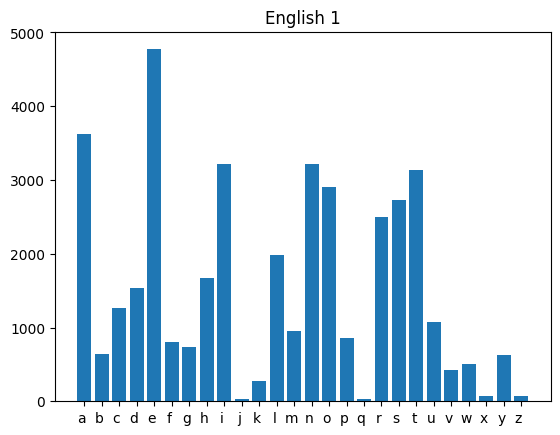

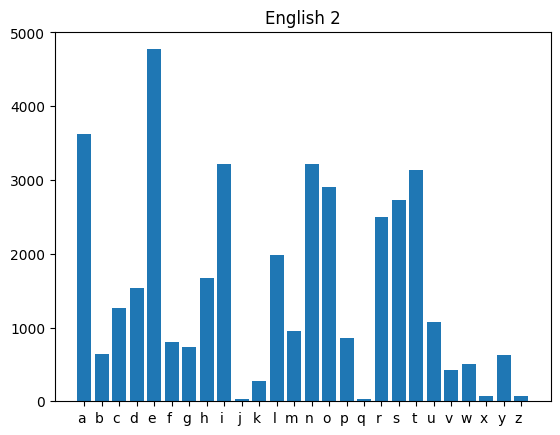

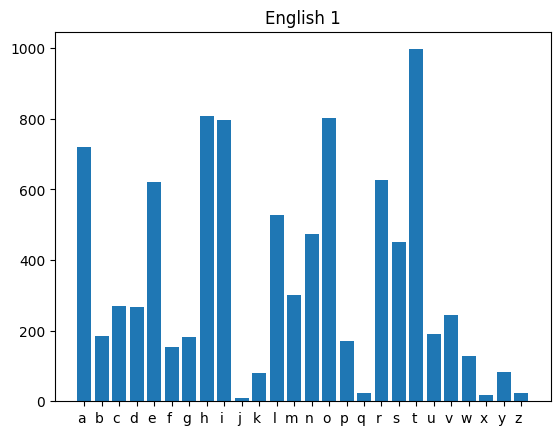

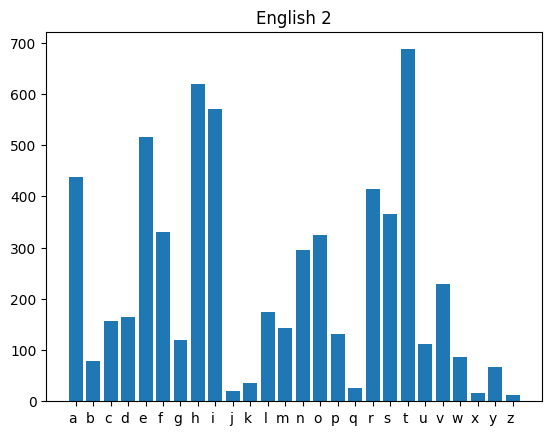

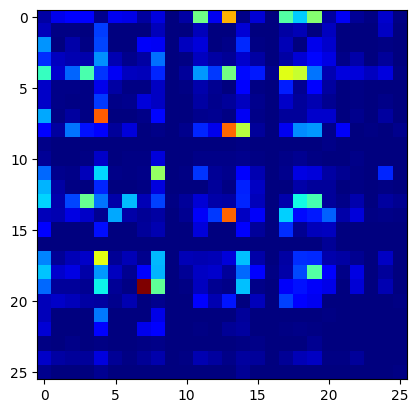

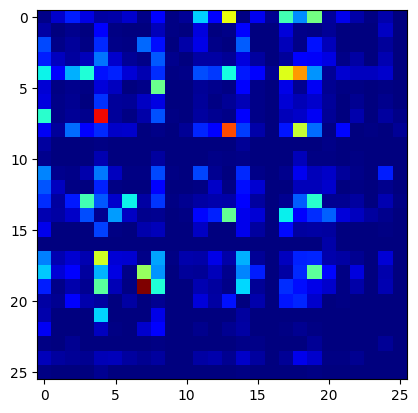

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


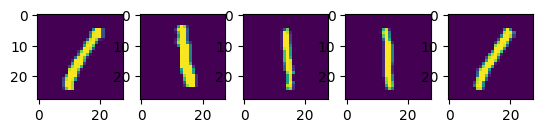

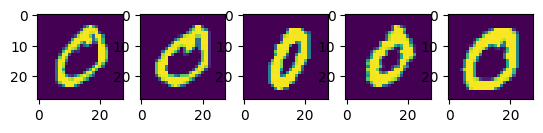

<ipython-input-14-4abcf55fcafa>:129: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


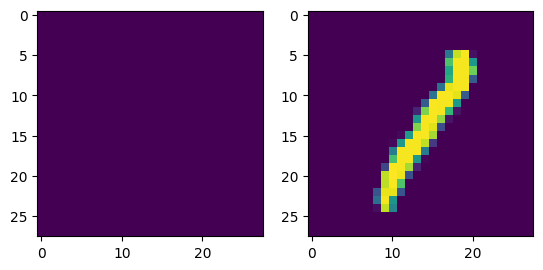

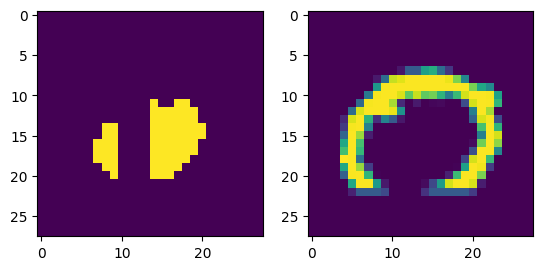

<ipython-input-14-4abcf55fcafa>:148: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


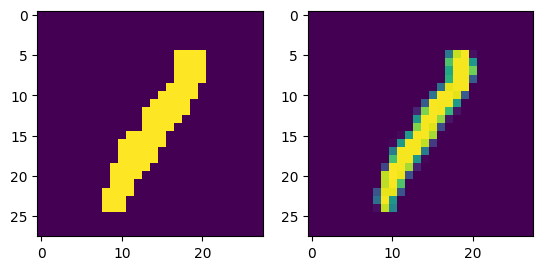

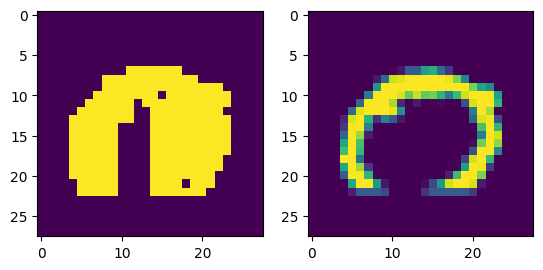

<ipython-input-14-4abcf55fcafa>:171: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


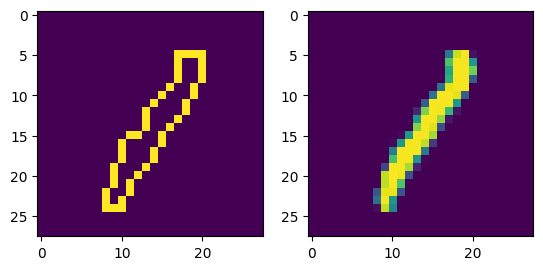

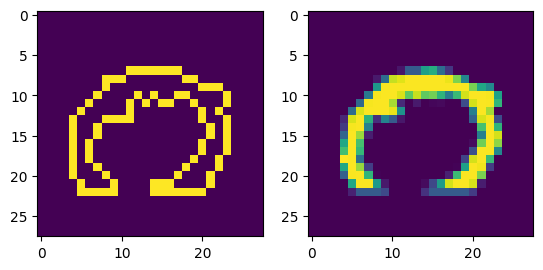

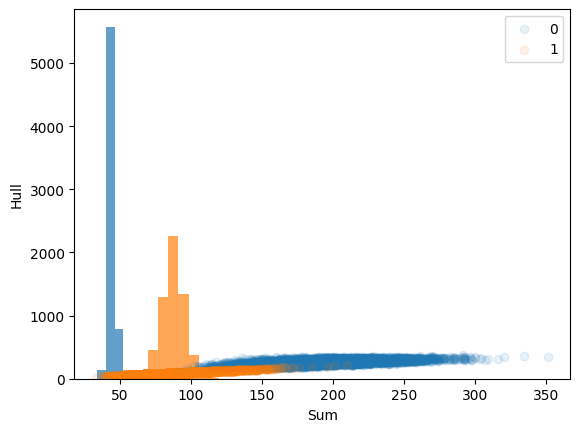

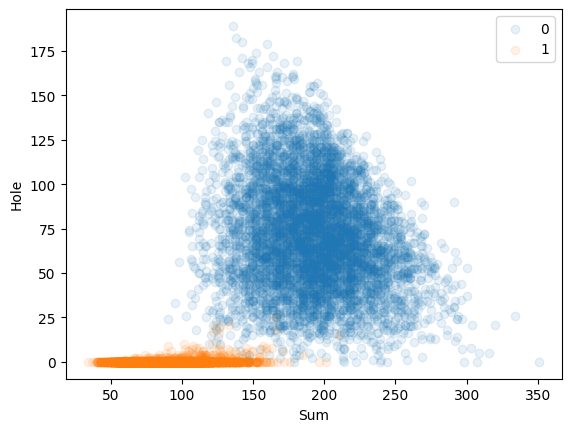

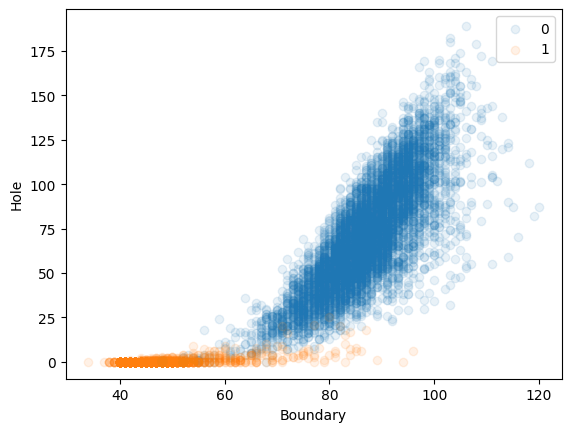

In [14]:
! pip install wikipedia
import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

topic1='lion'
topic2='fish'
wikipedia.set_lang('en')
# Disable auto_suggest to prevent incorrect page resolution
en1=wikipedia.page(topic1, auto_suggest=False).content
en2=wikipedia.page(topic2, auto_suggest=False).content
en1=en1.lower()
en2=en2.lower()

def cleanup(text):
  text=text.lower()
  text=re.sub('[^a-z]+','', text)
  return text

en1=cleanup(en1)
en2=cleanup(en2)
print(en1)
print(en2)

def tupletostring(tuple):
  string=''
  for i in tuple:
    string+=i+' '
    return string

def keytostring(keys):
  return [tupletostring(i) for i in keys]

def plothistogram(ngram):
  keys=keytostring(ngram.keys())
  values=list(ngram.values())
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

unigram_eng1 = Counter(ngrams(en1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(en1,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()
bigram_eng1 = Counter(ngrams(en1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(en2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)
plt.show()

# Fetch and process French text data similar to English
# Assuming 'topic1_fr' and 'topic2_fr' are your topics in French
topic1_fr = 'lion'  # Replace with actual French topic
topic2_fr = 'poisson'  # Replace with actual French topic

wikipedia.set_lang('fr')  # Set language to French
fr1 = wikipedia.page(topic1_fr, auto_suggest=False).content
fr2 = wikipedia.page(topic2_fr, auto_suggest=False).content
fr1 = fr1.lower()
fr2 = fr2.lower()
fr1 = cleanup(fr1)  # Apply cleanup function
fr2 = cleanup(fr2)

bigram_fr1 = Counter(ngrams(fr1, 2))
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()